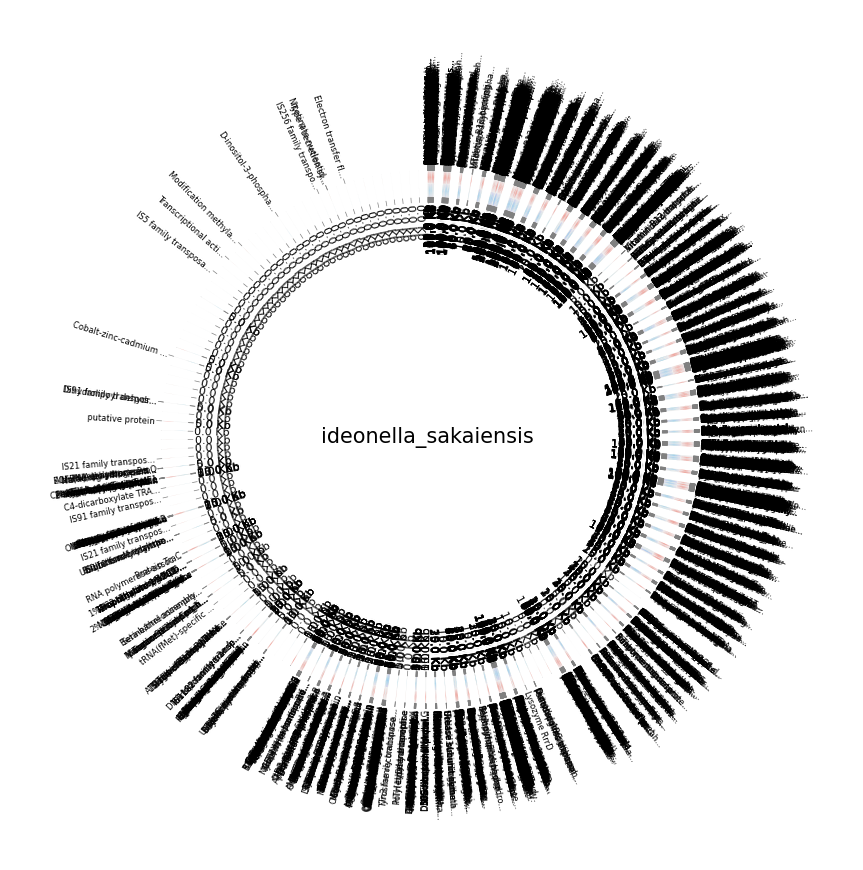

In [8]:
from pycirclize import Circos
from pycirclize.parser import Gff

gff_file = "/projectnb/bf528/students/rvboz/project-0-rboz1/results/GCF_001293525.1/GCF_001293525.1.gff"

# Load GFF file
gff = Gff(gff_file)

# Initialize circos instance
seqid2size = gff.get_seqid2size()
space = 0 if len(seqid2size) == 1 else 2
circos = Circos(sectors=seqid2size, space=space)
circos.text("ideonella_sakaiensis", size=15)

seqid2features = gff.get_seqid2features(feature_type="CDS")
for sector in circos.sectors:
    cds_track = sector.add_track((90, 100))
    cds_track.axis(fc="#EEEEEE", ec="none")

    features = seqid2features[sector.name]
    label_pos_list, labels = [], []
    for feature in features:
        # Plot CDS features
        if feature.location.strand == 1:
            cds_track.genomic_features(feature, plotstyle="arrow", r_lim=(95, 100), fc="salmon")
        else:
            cds_track.genomic_features(feature, plotstyle="arrow", r_lim=(90, 95), fc="skyblue")
        # Extract feature product label & position
        start, end = int(feature.location.start), int(feature.location.end)
        label_pos = (start + end) / 2
        label = feature.qualifiers.get("product", [""])[0]
        if label == "" or label.startswith("hypothetical"):
            continue
        if len(label) > 20:
            label = label[:20] + "..."
        label_pos_list.append(label_pos)
        labels.append(label)

    # Plot CDS product labels on outer position
    cds_track.xticks(
        label_pos_list,
        labels,
        label_orientation="vertical",
        show_bottom_line=True,
        label_size=6,
        line_kws=dict(ec="grey"),
    )

    # Plot xticks & intervals on inner position
    cds_track.xticks_by_interval(
        interval=5000,
        outer=False,
        show_bottom_line=True,
        label_formatter=lambda v: f"{v/ 1000:.1f} Kb",
        label_orientation="vertical",
        line_kws=dict(ec="grey"),
    )

fig = circos.plotfig()

fig.savefig("ideonella_sakaiensis_circos.png", dpi=300)